# Adjusted R² Score

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [4]:
# 1. Función para calcular R² ajustado
def adjusted_r2_score(y_true, y_pred, n_features):
    """
    Calcula R² ajustado manualmente.
    """
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adj_r2


In [6]:
# 2. Generar datos sintéticos con ruido y características útiles
np.random.seed(42)

X_useful, y = make_regression(n_samples=200, n_features=8, noise=15, random_state=42)

# Agregar ruido
n_noise_features = 15
X_noise = np.random.normal(0, 1, (200, n_noise_features))

# Combinar todo
X_combined = np.column_stack([X_useful, X_noise])

# Crear nombres de columnas
feature_names = ([f'Útil_{i+1}' for i in range(8)] + 
                 [f'Ruido_{i+1}' for i in range(n_noise_features)])

print(f"Dataset creado con {len(y)} observaciones:")
print(f"- {X_useful.shape[1]} características útiles")
print(f"- {X_noise.shape[1]} características de ruido")


Dataset creado con 200 observaciones:
- 8 características útiles
- 15 características de ruido


In [8]:
# 3. División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.3, random_state=42
)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


Datos de entrenamiento: (140, 23)
Datos de prueba: (60, 23)


In [10]:
# 4. Experimento: variación del número de características
results = []
feature_counts = [2, 5, 8, 12, 16, 20, 23]

for n_features in feature_counts:
    selector = SelectKBest(score_func=f_regression, k=n_features)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_sel, y_train)

    y_pred_train = model.predict(X_train_sel)
    y_pred_test = model.predict(X_test_sel)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = adjusted_r2_score(y_train, y_pred_train, n_features)
    adj_r2_test = adjusted_r2_score(y_test, y_pred_test, n_features)

    results.append({
        'n_features': n_features,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'adj_r2_train': adj_r2_train,
        'adj_r2_test': adj_r2_test
    })

    print(f"\nModelo con {n_features} características:")
    print(f"  R² entrenamiento: {r2_train:.4f}")
    print(f"  R² ajustado entrenamiento: {adj_r2_train:.4f}")
    print(f"  R² prueba: {r2_test:.4f}")
    print(f"  R² ajustado prueba: {adj_r2_test:.4f}")



Modelo con 2 características:
  R² entrenamiento: 0.6565
  R² ajustado entrenamiento: 0.6515
  R² prueba: 0.7091
  R² ajustado prueba: 0.6989

Modelo con 5 características:
  R² entrenamiento: 0.9163
  R² ajustado entrenamiento: 0.9132
  R² prueba: 0.8965
  R² ajustado prueba: 0.8869

Modelo con 8 características:
  R² entrenamiento: 0.9880
  R² ajustado entrenamiento: 0.9873
  R² prueba: 0.9847
  R² ajustado prueba: 0.9823

Modelo con 12 características:
  R² entrenamiento: 0.9885
  R² ajustado entrenamiento: 0.9874
  R² prueba: 0.9836
  R² ajustado prueba: 0.9795

Modelo con 16 características:
  R² entrenamiento: 0.9887
  R² ajustado entrenamiento: 0.9872
  R² prueba: 0.9834
  R² ajustado prueba: 0.9773

Modelo con 20 características:
  R² entrenamiento: 0.9889
  R² ajustado entrenamiento: 0.9870
  R² prueba: 0.9827
  R² ajustado prueba: 0.9738

Modelo con 23 características:
  R² entrenamiento: 0.9892
  R² ajustado entrenamiento: 0.9870
  R² prueba: 0.9845
  R² ajustado prueba: 0.

In [12]:
# 5. Convertir resultados a DataFrame
df_results = pd.DataFrame(results)
df_results.head()


,n_features,r2_train,r2_test,adj_r2_train,adj_r2_test
0,2,0.656478,0.709085,0.651463,0.698877
1,5,0.916318,0.896495,0.913195,0.886911
2,8,0.987987,0.984694,0.987253,0.982293
3,12,0.988458,0.983637,0.987367,0.979459
4,16,0.988690,0.983435,0.987219,0.977271


In [14]:
# 6. Demostración paso a paso del cálculo manual
print("\n--- Demostración del cálculo manual ---")
selector_demo = SelectKBest(score_func=f_regression, k=8)
X_demo = selector_demo.fit_transform(X_train, y_train)

model_demo = LinearRegression().fit(X_demo, y_train)
y_pred_demo = model_demo.predict(X_demo)

n = len(y_train)
p = 8
r2 = r2_score(y_train, y_pred_demo)

factor_penalizacion = (n - 1) / (n - p - 1)
adj_r2_manual = 1 - (1 - r2) * factor_penalizacion

print(f"n = {n}, p = {p}")
print(f"R² tradicional: {r2:.6f}")
print(f"Factor penalización: {factor_penalizacion:.6f}")
print(f"R² ajustado manual: {adj_r2_manual:.6f}")
print(f"Verificación función: {adjusted_r2_score(y_train, y_pred_demo, p):.6f}")



--- Demostración del cálculo manual ---
n = 140, p = 8
R² tradicional: 0.987987
Factor penalización: 1.061069
R² ajustado manual: 0.987253
Verificación función: 0.987253


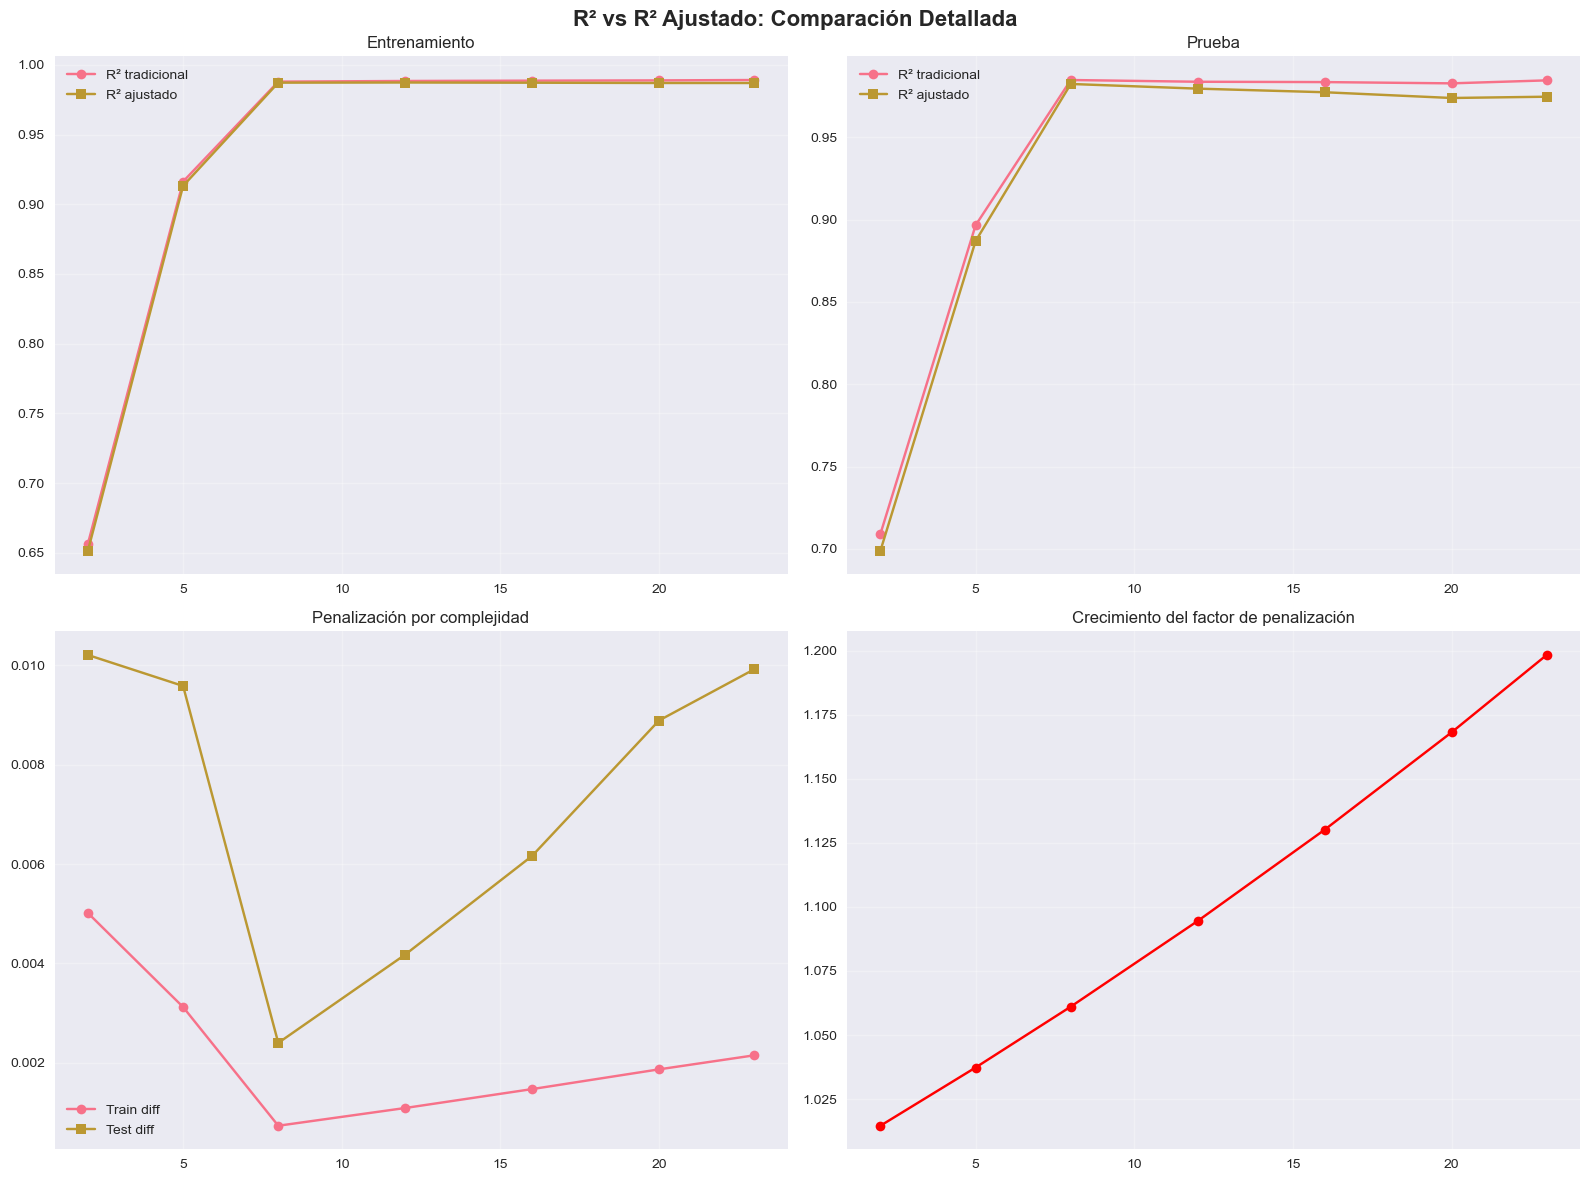

In [16]:
# 7. Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('R² vs R² Ajustado: Comparación Detallada', fontsize=16, fontweight='bold')

# Gráfico 1
axes[0, 0].plot(df_results['n_features'], df_results['r2_train'], 'o-', label='R² tradicional')
axes[0, 0].plot(df_results['n_features'], df_results['adj_r2_train'], 's-', label='R² ajustado')
axes[0, 0].set_title('Entrenamiento')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2
axes[0, 1].plot(df_results['n_features'], df_results['r2_test'], 'o-', label='R² tradicional')
axes[0, 1].plot(df_results['n_features'], df_results['adj_r2_test'], 's-', label='R² ajustado')
axes[0, 1].set_title('Prueba')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Diferencia
diff_train = df_results['r2_train'] - df_results['adj_r2_train']
diff_test = df_results['r2_test'] - df_results['adj_r2_test']
axes[1, 0].plot(df_results['n_features'], diff_train, 'o-', label='Train diff')
axes[1, 0].plot(df_results['n_features'], diff_test, 's-', label='Test diff')
axes[1, 0].set_title('Penalización por complejidad')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Factor de penalización
n_train = len(y_train)
penalties = [(n_train - 1) / (n_train - p - 1) for p in df_results['n_features']]
axes[1, 1].plot(df_results['n_features'], penalties, 'o-', color='red')
axes[1, 1].set_title('Crecimiento del factor de penalización')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [18]:
# 8. Análisis de resultados
print("\n--- Análisis de Resultados ---")
best_adj_idx = df_results['adj_r2_test'].idxmax()
best_model = df_results.iloc[best_adj_idx]

print(f"Mejor modelo (R² ajustado): {best_model['n_features']} características")
print(f"  R² ajustado prueba: {best_model['adj_r2_test']:.4f}")
print(f"  R² prueba: {best_model['r2_test']:.4f}")

best_r2_idx = df_results['r2_test'].idxmax()
r2_model = df_results.iloc[best_r2_idx]

print(f"\nModelo con máximo R² tradicional: {r2_model['n_features']} características")
print(f"  R² prueba: {r2_model['r2_test']:.4f}")
print(f"  R² ajustado prueba: {r2_model['adj_r2_test']:.4f}")

if best_adj_idx != best_r2_idx:
    print(f"\nR² ajustado recomienda un modelo más simple ({best_model['n_features']} vs {r2_model['n_features']})")



--- Análisis de Resultados ---
Mejor modelo (R² ajustado): 8.0 características
  R² ajustado prueba: 0.9823
  R² prueba: 0.9847

Modelo con máximo R² tradicional: 8.0 características
  R² prueba: 0.9847
  R² ajustado prueba: 0.9823


In [20]:
# 9. Demostración de overfitting severo
print("\n--- Demostración de Overfitting ---")
X_small, y_small = make_regression(n_samples=30, n_features=25, noise=10, random_state=42)

model_overfit = LinearRegression()
model_overfit.fit(X_small, y_small)
y_pred_overfit = model_overfit.predict(X_small)

r2_overfit = r2_score(y_small, y_pred_overfit)
adj_r2_overfit = adjusted_r2_score(y_small, y_pred_overfit, 25)

print(f"R² tradicional: {r2_overfit:.4f}")
print(f"R² ajustado: {adj_r2_overfit:.4f}")
print("→ El R² ajustado detecta el sobreajuste.")



--- Demostración de Overfitting ---
R² tradicional: 0.9999
R² ajustado: 0.9990
→ El R² ajustado detecta el sobreajuste.


In [24]:
# 10. Tabla resumen
print("\n--- Tabla Resumen ---")
print("N_Features | R²_Train | R²_Adj_Train | R²_Test | R²_Adj_Test | Recomendación")
print("-" * 80)

for i, row in df_results.iterrows():
    rec = "ÓPTIMO" if i == best_adj_idx else ""
    if row['adj_r2_test'] < row['adj_r2_train'] - 0.1:
        rec += " Overfitting"
    print(f"{int(row['n_features']):10d} | {row['r2_train']:8.4f} | {row['adj_r2_train']:12.4f} | "
          f"{row['r2_test']:7.4f} | {row['adj_r2_test']:11.4f} | {rec}")




--- Tabla Resumen ---
N_Features | R²_Train | R²_Adj_Train | R²_Test | R²_Adj_Test | Recomendación
--------------------------------------------------------------------------------
         2 |   0.6565 |       0.6515 |  0.7091 |      0.6989 | 
         5 |   0.9163 |       0.9132 |  0.8965 |      0.8869 | 
         8 |   0.9880 |       0.9873 |  0.9847 |      0.9823 | ÓPTIMO
        12 |   0.9885 |       0.9874 |  0.9836 |      0.9795 | 
        16 |   0.9887 |       0.9872 |  0.9834 |      0.9773 | 
        20 |   0.9889 |       0.9870 |  0.9827 |      0.9738 | 
        23 |   0.9892 |       0.9870 |  0.9845 |      0.9746 | 
